In [23]:
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9)
plt.rcParams['font.size'] = 25

## What is data science?

- "an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from data in various forms, both structured and unstructured"

- "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data

- "fourth paradigm" along with theory, experimentation, and computation

- is data science actually a useful term? is it a too-general buzzword?
- how does data science differ from statistics?


## Hertzsprung-Russell Diagram: Stellar Evolution

### How can you describe a star?

* Apparent magnitude (brightness from Earth)
* Distance
* Temperature
* Absolute magnitude (brightness very close to star)
* Radius 
* Mass

### Are some parameters more useful than others? Theory vs. Observation?

![](http://spiff.rit.edu/classes/phys301/lectures/hr/old_hr_small.gif)
Russell, _Nature_, 93, 252, 1914

![](https://www.eso.org/public/archives/images/screen/eso0728c.jpg)

## Evolving a Star

<img src="https://raw.githubusercontent.com/cassidymwagner/data_science_hr_diagram/master/images/1M_hr_diagram.gif">

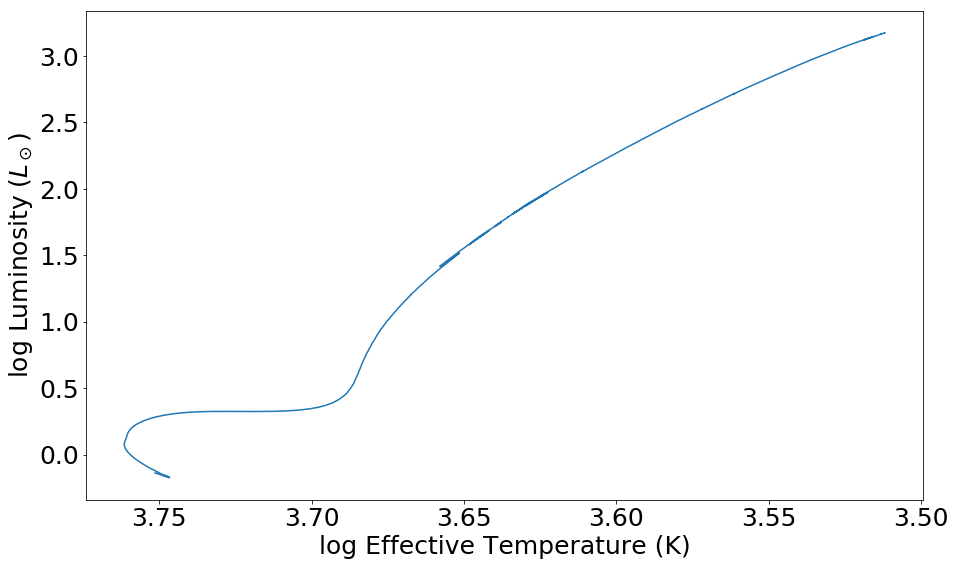

In [49]:
h_1M = mr.MesaData('mesa_data/1M_pre_ms_to_wd/LOGS/history.data')

plt.plot(h_1M.log_Teff,h_1M.log_L)
plt.xlabel('log Effective Temperature (K)')
plt.ylabel(r'log Luminosity ($L_\odot$)')
plt.gca().invert_xaxis()

<img src="https://raw.githubusercontent.com/cassidymwagner/data_science_hr_diagram/master/images/5M_hr_diagram.gif">

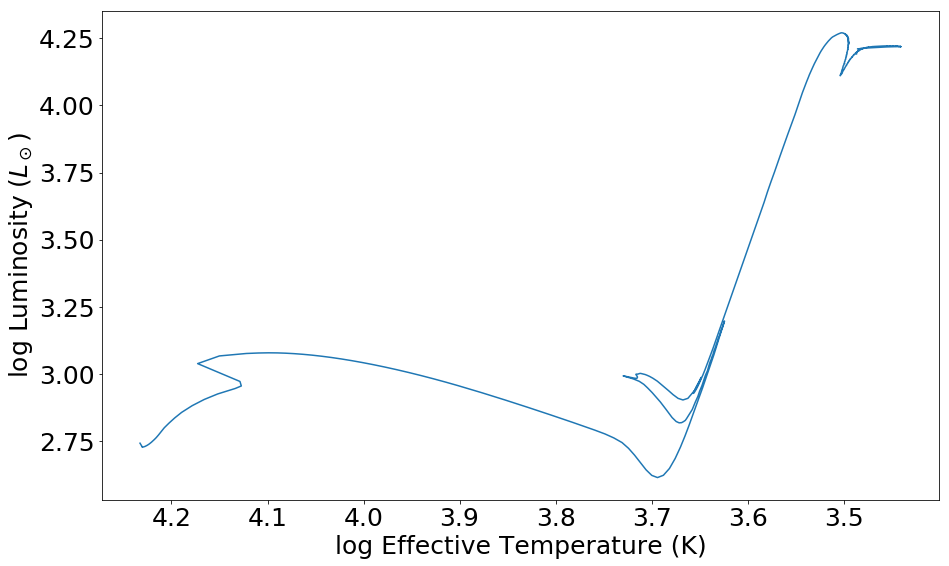

In [26]:
h_5M = mr.MesaData('mesa_data/5M_pre_ms_to_wd/LOGS/history.data')

plt.plot(h_5M.log_Teff,h_5M.log_L)
plt.xlabel('log Effective Temperature (K)')
plt.ylabel(r'log Luminosity ($L_\odot$)')
plt.gca().invert_xaxis()

## Digging into datasets
[HYG Database](http://www.astronexus.com/hyg)
contains all ~120,000 stars that are either:  

- brighter than a certain magnitude cutoff (magnitude +7.5 to +9.0) or 
- within 50 parsecs (about 160 light years) from the Sun.


In [27]:
stars = pd.read_csv('http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz')

HYG dataset reports flux ratio 'color index' $B-V$; can be transformed to temperature using:
$${\displaystyle T=4600\,\mathrm {K} \left({\frac {1}{0.92(B-V)+1.7}}+{\frac {1}{0.92(B-V)+0.62}}\right).}$$
(Ballesteros 2012)

In [28]:
stars.loc[:,'temp'] = 4600 * (1 / (0.92 * stars.ci + 1.7) + 1 / (0.92 * stars.ci + 0.62))
stars.loc[:,'logtemp'] = np.log10(stars.temp)
stars.loc[:,'loglum'] = np.log10(stars.lum)

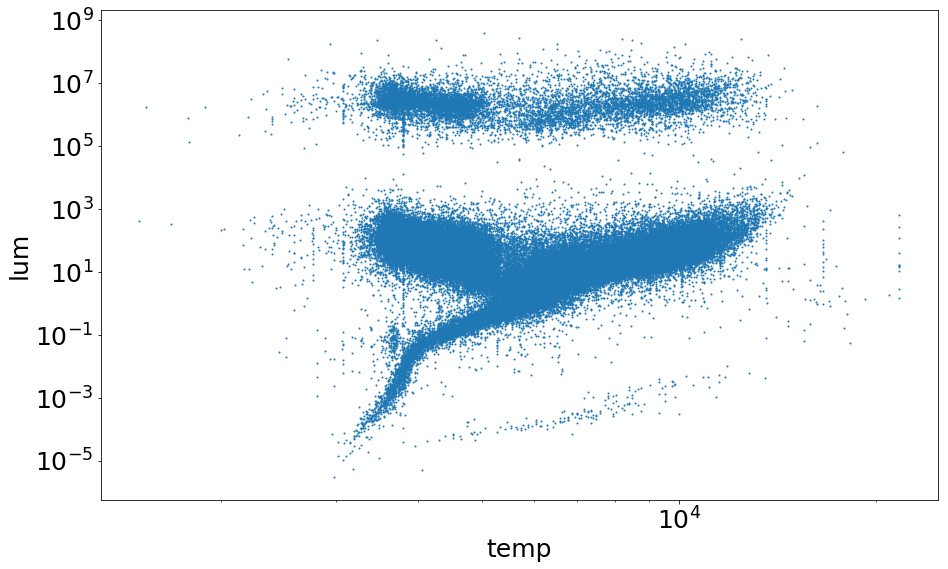

In [29]:
stars.plot.scatter(x='temp', y='lum', loglog=True, s=1)

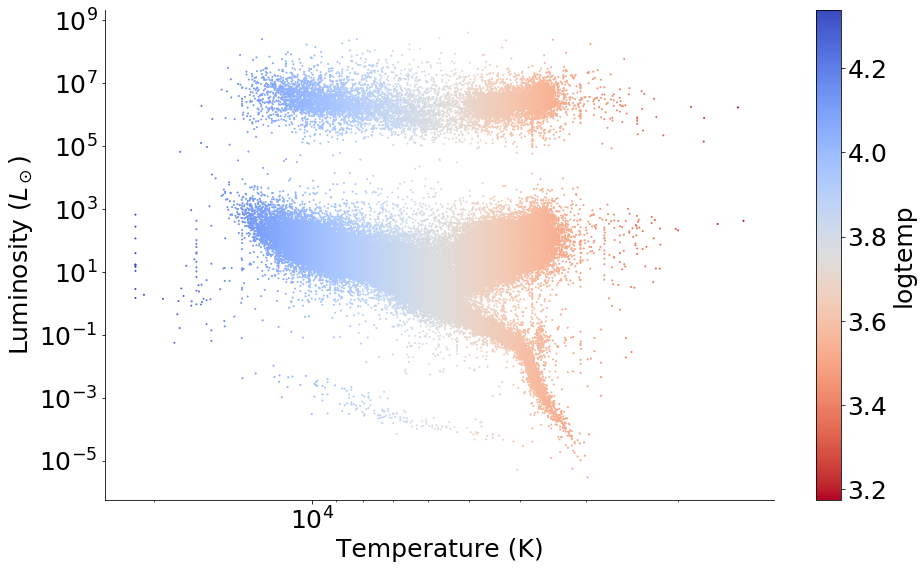

In [41]:
fig, ax = plt.subplots()
stars.plot.scatter(x='temp', y='lum', s=1, 
                loglog=True,
                c='logtemp', colormap='coolwarm_r', 
                ax=ax)
ax.set_xlabel('Temperature (K)'); ax.set_ylabel(r'Luminosity ($L_\odot$)')
ax.invert_xaxis(); sns.despine()

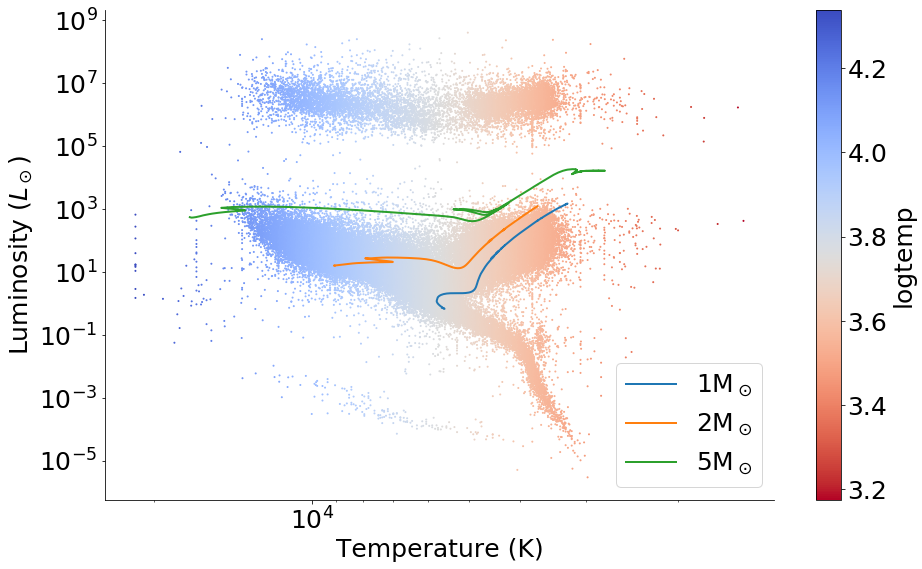

In [31]:
fig, ax = plt.subplots()
stars.plot.scatter(x='temp', y='lum', s=1, 
                loglog=True,
                c='logtemp', colormap='coolwarm_r',
                ax=ax)
ax.plot(10**h_1M.log_Teff,10**h_1M.log_L,lw=2,label=r'1M$_\odot$')
ax.plot(10**h_2M.log_Teff,10**h_2M.log_L,lw=2,label=r'2M$_\odot$')
ax.plot(10**h_5M.log_Teff,10**h_5M.log_L,lw=2,label=r'5M$_\odot$')
ax.set_xlabel('Temperature (K)'); ax.set_ylabel(r'Luminosity ($L_\odot$)')
ax.legend()
ax.invert_xaxis(); sns.despine()

![](https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png)

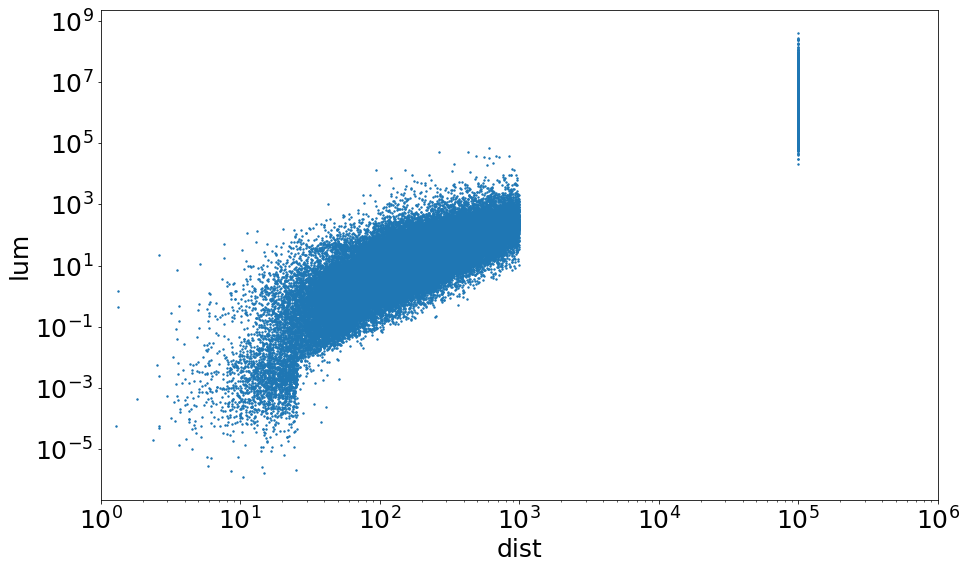

In [32]:
stars.plot.scatter(x='dist', y='lum', s=2, loglog=True, xlim=(1,1e6))

$$F = \frac{L}{4\pi d^2}$$

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/usr/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'figsize'
  s)


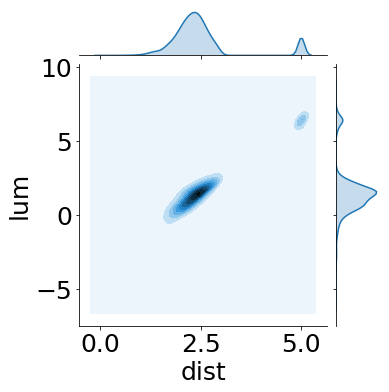

In [39]:
data = np.log10(stars.loc[:,['dist', 'lum']]).replace(
     [np.inf, -np.inf], np.nan).dropna()
sns.jointplot(data=data, x='dist', y='lum', kind='kde')

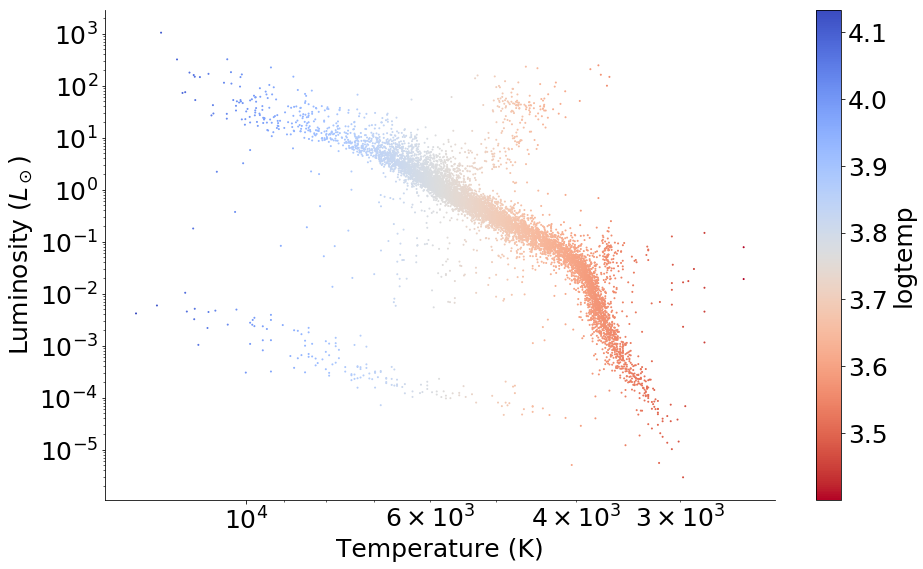

In [37]:
close_stars = stars[stars.dist < 50]
fig, ax = plt.subplots()
close_stars.plot.scatter(x='temp', y='lum', s=1, 
                loglog=True,
                c='logtemp', colormap='coolwarm_r', 
                ax=ax)
ax.set_xlabel('Temperature (K)'); ax.set_ylabel(r'Luminosity ($L_\odot$)')
ax.invert_xaxis(); sns.despine()

In [35]:
from sklearn import mixture, cluster, neighbors
n_clusters = 3
bgmm = mixture.BayesianGaussianMixture(n_components=n_clusters, 
    weight_concentration_prior_type='dirichlet_process',
    weight_concentration_prior=1e10)

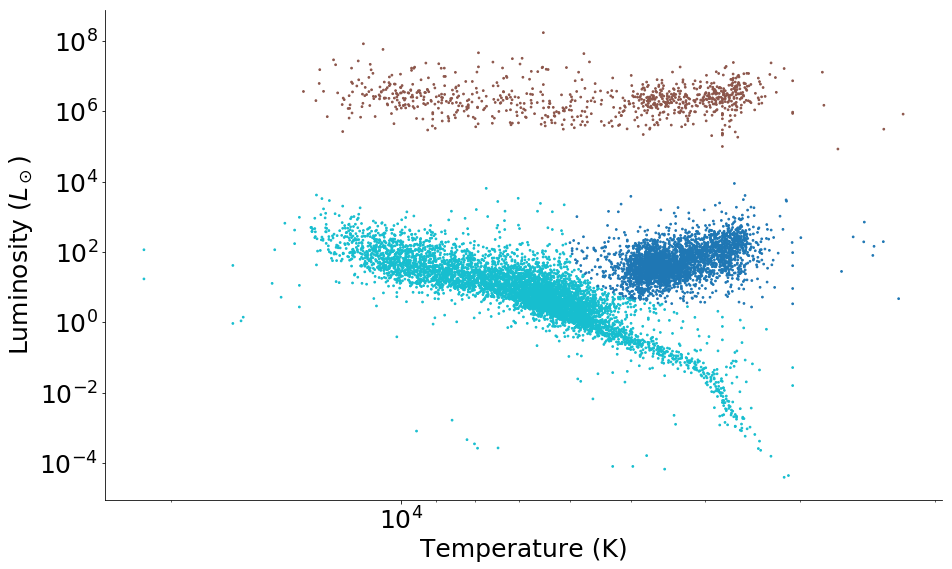

In [36]:
#clustering_data = close_stars.loc[:, ['temp', 'lum']].dropna()
clustering_data = stars.loc[:, ['temp', 'lum']].dropna().sample(10000)

bgmm.fit(np.log10(clustering_data))
labels = bgmm.predict(np.log10(clustering_data))

fig, ax = plt.subplots()
clustering_data.plot.scatter(x='temp', y='lum', s=3, 
                loglog=True, colormap='tab10',
                c=labels, colorbar=False,
                ax=ax)
ax.set_xlabel('Temperature (K)'); ax.set_ylabel(r'Luminosity ($L_\odot$)')
ax.invert_xaxis(); sns.despine()

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_gmm_pdf_001.png)